# Librerías

In [1]:
import pandas as pd
from palette_creator import PaletteCreator, show_palette, bit_cut, bit_amplify, gaussian_filter
from pathlib import Path
import cv2
import json

# Funciones auxiliares

In [21]:
import numpy as np

def load_img(path_img):
    path_img = str(path_img)

    # Check if path exists
    if not Path(path_img).exists():
        print(f"Path {path_img} doesn't exist")
        return None
    
    return cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2RGB)

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
                            np.int16, np.int32, np.int64, np.uint8,
                            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        elif isinstance(obj, (np.float_, np.float16, np.float32,
                              np.float64)):
            return float(obj)
        elif isinstance(obj, (np.ndarray,)):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def save_results_to_db(db, method, palettes, proportions): 
    db[f"{method}_palette"], db[f"{method}_proportions"] = palettes, proportions
    db[f"{method}_palette"] = db[f"{method}_palette"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))
    db[f"{method}_proportions"] = db[f"{method}_proportions"].apply(lambda x: json.dumps(x, cls=NumpyEncoder))


# Configuración

In [22]:
# establecer rutas
PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
PATH_IMAGES_METADATA = Path("beatriz_gonzalez.csv")

db = pd.read_csv(PATH_IMAGES_METADATA)
db["path_image"] = PATH_IMAGES_FOLDER/db["filename"]

# Preprocesamiento

1. Cargar imágenes
2. Aplicar filtros o técnicas de preprocesamiento (o combinaciones)
    - Filtro gaussiano
    - Bit-cutting

In [4]:
%%time
images = [load_img(path_image) for path_image in db["path_image"][:10]] # cargar imagenes en una lista

CPU times: user 143 ms, sys: 104 ms, total: 247 ms
Wall time: 132 ms


In [5]:
# aplicar bit-cutting removiendo 4 bits (k=4)
preprocessed_images = [bit_cut(image, k=4) for image in images]

# aplicar filtro gaussiano
# preprocessed_images = [gaussian_filter(image) for image in images]

#aplicar ambos
#preprocessed_images = [bit_cut(gaussian_filter(image), k=4) for image in images]


# Procesamiento Kmeans

In [6]:
pc = PaletteCreator(method="kmeans")

In [7]:
%%time
palettes, proportions = pc.create_palette(preprocessed_images) # crear paletas

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.46it/s]

CPU times: user 10.8 s, sys: 15.2 s, total: 25.9 s
Wall time: 2.89 s


In [28]:
bit_amplify(np.array(results[0][0]))

array([[112, 120,  96],
       [224, 232, 224],
       [ 96,  96,  80],
       [104,  48,  48],
       [ 40,  32,  32],
       [168, 168, 152]])

## Post procesamiento de paletas

In [23]:
# en caso de haber hecho bit-cutting volver a amplificar el espacio rgb
palettes = [bit_amplify(palette, k=4) for palette in palettes]

## Guardar resultados

In [7]:
#save_results_to_db(db, "kmeans", palettes, proportions)
#db.to_csv(PATH_IMAGES_METADATA, index=False)

# Ejemplo de visualización

In [5]:
#db = pd.read_csv(PATH_IMAGES_METADATA)

In [19]:
#palette_img = db['kmeans_palette'].values
#proportions_img = db['kmeans_proportions'].values

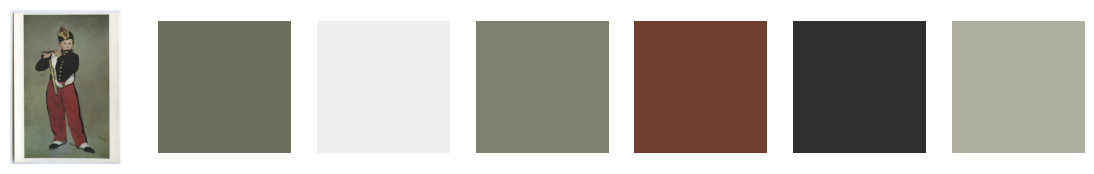

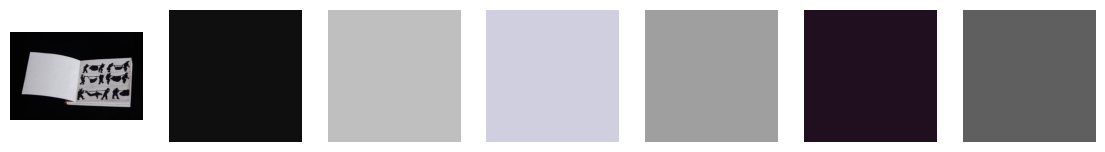

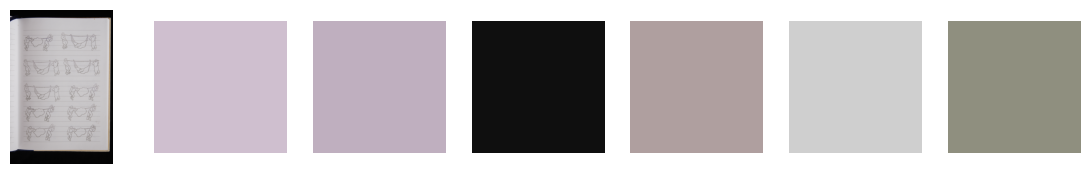

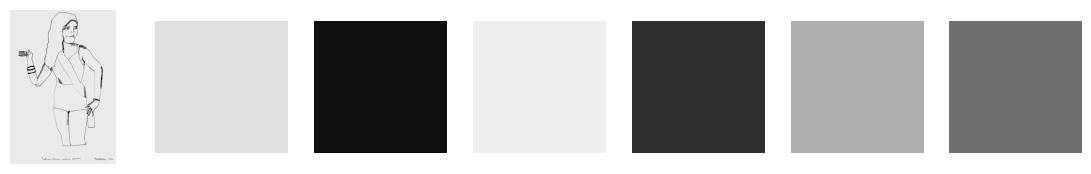

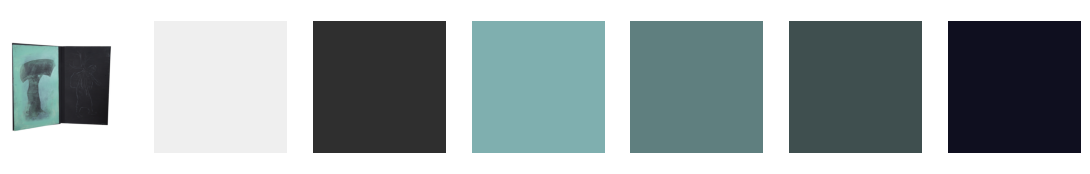

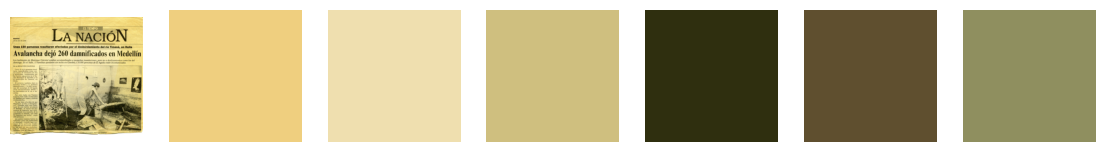

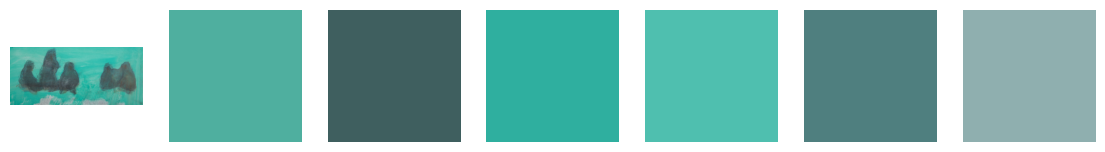

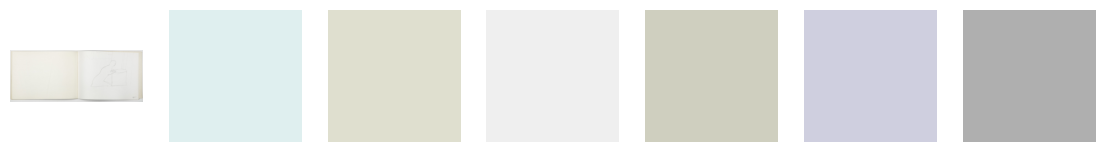

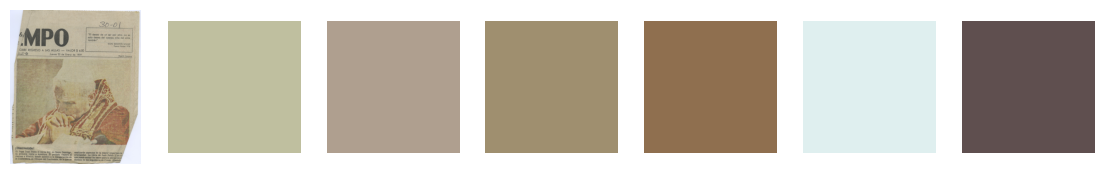

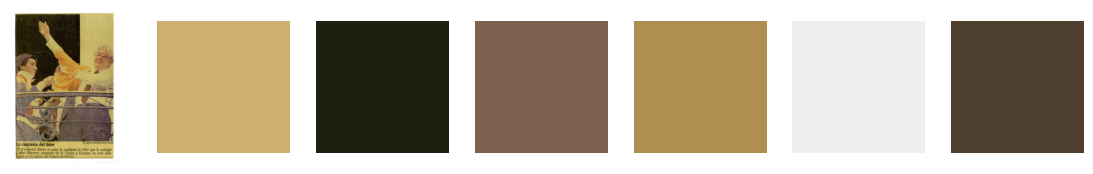

In [26]:
for i, image in enumerate(images[:10]):
    if image is not None:
        img_palette = palettes[i]
        show_palette(img_palette, img=image)